<a href="https://colab.research.google.com/github/amadadi0409/SCAI-Phishing-Emails/blob/main/SCAI1Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Implemented by: Arnav Sharma, Adwaith Madadi, Anish Kondamadugula
#SCAI Competition: Winter Quarter 2023-2024

#importing all the necessary libraries for building and training the neural network model.
import pandas as pd
import numpy as np
import os
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,Dropout,Activation,Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer



In [ ]:
#Data preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import regex as re

#Feature Engineering
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

#Data Splitting
from sklearn.model_selection import train_test_split

#Results + Visualization
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,f1_score, precision_score, recall_score
import seaborn as sns




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

#csv file
dataset = pd.read_csv(r'/content/combined_data.csv')



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
dataset.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [ ]:
dataset

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


In [ ]:
print(dataset.isnull().sum())

label    0
text     0
dtype: int64


In [ ]:
print(dataset.shape)

(83448, 2)


In [ ]:
dataset['text']

0        ounce feather bowl hummingbird opec moment ala...
1        wulvob get your medircations online qnb ikud v...
2         computer connection from cnn com wednesday es...
3        university degree obtain a prosperous future m...
4        thanks for all your answers guys i know i shou...
                               ...                        
83443    hi given a date how do i get the last date of ...
83444    now you can order software on cd or download i...
83445    dear valued member canadianpharmacy provides a...
83446    subscribe change profile contact us long term ...
83447    get the most out of life ! viagra has helped m...
Name: text, Length: 83448, dtype: object

In [ ]:
dataset["text_lower"] = dataset["text"].str.lower() #making text lowercase

In [ ]:
#Using a function to remove special characters
special_chars = string.punctuation
print(special_chars)

def removeSpecial(word):
  return word.translate(str.maketrans('', '', special_chars))

#function to remove numbers
def removeNumbers(word):
  res=re.sub("[0-9]","",word)
  return res



!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
dataset["text_lower"] = dataset["text_lower"].apply(removeSpecial) #Takes each text entry in the "text_lower" column and removes any special characters

In [ ]:
dataset["text_lower"] = dataset["text_lower"].apply(removeNumbers) #Takes each text entry in the "text_lower" column  and removes any numbers

In [ ]:

'''IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)'''

'IOPub data rate exceeded.\nThe notebook server will temporarily stop sending output\nto the client in order to avoid crashing it.\nTo change this limit, set the config variable\n`--NotebookApp.iopub_data_rate_limit`.\n\nCurrent values:\nNotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)\nNotebookApp.rate_limit_window=3.0 (secs)'

In [ ]:
stop_words = set(stopwords.words('english'))
print(stop_words)
def remove_stop_words(words):
  wordle = []
  for w in words:
    if w not in stop_words:
      wordle.append(w)
  return wordle


{'below', 'don', 'themselves', 'was', 'further', 'doing', 'mustn', 'there', 'most', 'that', "won't", 'wouldn', 'this', 'these', 'on', 'during', "needn't", 'll', 'itself', "she's", 'hers', 'them', 'no', 't', "hasn't", 'doesn', 'nor', "shouldn't", 'but', 'where', 'any', "should've", 're', 'at', 'not', 'couldn', 'under', 'theirs', 'such', 've', "shan't", 'you', "it's", 'their', 'now', 'ain', 'been', 'haven', "you've", 'yourself', 'all', 'y', 'they', 'which', 'what', 'in', 'can', "isn't", 'will', 'from', 'the', 'herself', "couldn't", 'ourselves', 'than', 'is', 'whom', 'have', 'when', 'shouldn', 'above', 'needn', "that'll", 'am', 'for', 'before', 'more', 'she', 'between', "you'll", 'hasn', 'after', "mustn't", "aren't", 'a', 'only', 'of', 'then', 'has', 'him', 'yourselves', 'being', 'if', 'having', 'by', "didn't", 'won', 'were', 'ours', 'own', 'myself', 'd', 'while', 'through', "wasn't", 'yours', 'be', 'down', 'aren', 'once', 'his', 'i', "weren't", 'or', 'does', 'didn', 'about', 'why', 'out'

In [ ]:
dataset['text_lower'] = dataset['text_lower'].apply(word_tokenize) #Takes the dataset and splits each text into a list of words.


In [ ]:
dataset['text_lower'].head() #Shows the beginning of the text data after the sentences have been splitted into individual words.

0    [ounce, feather, bowl, hummingbird, opec, mome...
1    [wulvob, get, your, medircations, online, qnb,...
2    [computer, connection, from, cnn, com, wednesd...
3    [university, degree, obtain, a, prosperous, fu...
4    [thanks, for, all, your, answers, guys, i, kno...
Name: text_lower, dtype: object

In [ ]:
dataset['text_lower'] = dataset['text_lower'].apply(remove_stop_words) #Takes each text entry in the "text_lower" column and removes any stop words

In [ ]:
dataset['text_lower'].head() #Shows the beginning of the text data after the sentences have been splitted into individual words.

0    [ounce, feather, bowl, hummingbird, opec, mome...
1    [wulvob, get, medircations, online, qnb, ikud,...
2    [computer, connection, cnn, com, wednesday, es...
3    [university, degree, obtain, prosperous, futur...
4    [thanks, answers, guys, know, checked, rsync, ...
Name: text_lower, dtype: object

In [ ]:
#Created a function that takes a list of words and then scans each word for URLs and removes them and then returns the modified list of words without any URLs.
def removeURL(words):
  noURL = []
  for w in words:
    noURL.append(re.sub(r"https?:[^\s]+", '', w))
  return noURL

'''def cleanURL(words): #cleans after removeing url links
  c1 = []
  c2 = []
  for w in words:
    c1.append(w.lstrip("httpswww"))
  for c in c1:
    c2.append(w.lstrip("https"))
  return c1'''

#Created a function that takes a list of words and then scans each word for HTML tags and removes them and then returns the modified list of words without any HTML tags.
def removeHTML(words):
  res = []
  for w in words:
    res.append(re.sub(r'<.*?>', "", w))
  return res


In [ ]:
dataset['text_lower'] = dataset['text_lower'].apply(removeURL) #Takes each text entry in the "text_lower" column and removes any URLs

In [ ]:
dataset['text_lower'].head() #Shows the beginning of text data after the URLs have been removed from the email.

0    [ounce, feather, bowl, hummingbird, opec, mome...
1    [wulvob, get, medircations, online, qnb, ikud,...
2    [computer, connection, cnn, com, wednesday, es...
3    [university, degree, obtain, prosperous, futur...
4    [thanks, answers, guys, know, checked, rsync, ...
Name: text_lower, dtype: object

In [ ]:
#dataset['text_lower'] = dataset['text_lower'].apply(cleanURL)

In [ ]:
#dataset['text_lower'].head() #Shows the beginning of the text data after the urls have been removed.

In [ ]:
dataset['text_lower'] = dataset['text_lower'].apply(removeHTML) #Takes each text entry in the "text_lower" column and removes any HTML Tags

In [ ]:
dataset['text_lower'].head() #Shows the beginning of text data after the HTML Tags have been removed from the email.

0    [ounce, feather, bowl, hummingbird, opec, mome...
1    [wulvob, get, medircations, online, qnb, ikud,...
2    [computer, connection, cnn, com, wednesday, es...
3    [university, degree, obtain, prosperous, futur...
4    [thanks, answers, guys, know, checked, rsync, ...
Name: text_lower, dtype: object

In [ ]:
dataset['text_lower'] = dataset['text_lower'].apply(' '.join) #Concaternate the elements of each row in the "text_lower" column of the dataset into a single string that is seperated by spaces.

In [ ]:
dataset['text_lower'].head() #Shows the beginning of text data after it is in a single string that is seperated by spaces.

0    ounce feather bowl hummingbird opec moment ala...
1    wulvob get medircations online qnb ikud viagra...
2    computer connection cnn com wednesday escapenu...
3    university degree obtain prosperous future mon...
4    thanks answers guys know checked rsync manual ...
Name: text_lower, dtype: object

In [ ]:
dataset['text_lower']

0        ounce feather bowl hummingbird opec moment ala...
1        wulvob get medircations online qnb ikud viagra...
2        computer connection cnn com wednesday escapenu...
3        university degree obtain prosperous future mon...
4        thanks answers guys know checked rsync manual ...
                               ...                        
83443    hi given date get last date month data form yy...
83444    order software cd download site immediately de...
83445    dear valued member canadianpharmacy provides w...
83446    subscribe change profile contact us long term ...
83447    get life viagra helped millions men good cause...
Name: text_lower, Length: 83448, dtype: object

In [ ]:
#Data Splitting Here
#Splits the text column of the dataset as input data(x) and the labl column as the output data(y).
x_train, x_test, y_train, y_test = train_test_split(dataset['text_lower'], dataset['label'], test_size = 0.3, train_size = 0.7, random_state = 1)
print(x_train)
print(y_train)
print(x_test)
print(y_test)


28853    escapenumber escapenumber escapenumber escapen...
23338    hi j andres probably better using adeescapenum...
57303    carry prescription non prescription drugs coul...
76772    cbs news learned four people charged thwarted ...
73777    downey simple pleasures r fabric softener samp...
                               ...                        
21440    hi folks attached go updating sambaescapenumbe...
73349    biostatistician statistical programmer data an...
50057    know escapenumber girls prefer guys descent ra...
5192     sebastian p luque wrote came across case there...
77708    order provide appropriate degree coordination ...
Name: text_lower, Length: 58413, dtype: object
28853    0
23338    0
57303    1
76772    0
73777    1
        ..
21440    0
73349    0
50057    1
5192     0
77708    0
Name: label, Length: 58413, dtype: int64
48104    team attached memo would like send hart settin...
41270    hi attached patch minimally enables named stre...
17204    dear customer s

In [ ]:
#Input Size
max_words = 5000

#Initializes the tokenizer object.
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

iii = 0
while iii < 5:
  print(x_train_seq[iii])
  iii+=1




[1, 1, 1, 1, 1, 63, 1415, 84, 178, 284, 396, 86, 1051, 28, 3151, 22, 48, 1267, 179, 187, 4142, 75, 992, 2184, 670, 255, 3534, 63, 18, 695, 129, 2194, 2758, 695, 91, 13, 41, 418, 91, 78, 8, 288, 828, 13, 41, 418, 15, 78, 8, 3, 387, 78, 8]
[232, 153, 704, 261, 111, 331, 87, 1257, 68, 13, 111, 3176, 1505, 48, 756, 2674, 271, 489, 153, 84, 521, 3649, 12, 5, 277, 239, 1167, 48, 3177, 3353, 869, 631, 1767, 3176, 1505, 172, 131, 5, 1505, 343, 48, 863, 10, 1, 2202, 1, 1505, 1179, 1179, 268, 109, 153, 664, 40, 149, 1013, 5, 15, 43, 116, 46, 44, 66, 19, 169, 43, 46, 44, 79, 93, 5, 15, 9, 54, 55, 52, 3, 11, 5, 74, 8, 55, 52, 40, 71, 167, 164, 81, 139, 175, 56, 257, 34, 421, 3, 11, 2554, 4, 172, 2171, 863, 4424, 40, 5, 15, 66, 19, 1342, 2554, 4, 5, 15, 43, 116, 46, 44, 66, 43, 46, 44, 79, 93, 5, 54, 55, 52, 3, 11, 5, 74, 8, 55, 52, 71, 167, 164, 81, 139, 175, 56]
[2703, 1793, 477, 1793, 346, 51, 68, 750, 482, 917, 396, 1109, 1420, 1793, 554, 64, 461, 954, 217, 27, 191, 231, 137, 362, 22, 2556, 127

In [ ]:
mean_length = dataset['text_lower'].apply(len).mean()
print(f"Mean Length of Emails: {str(mean_length)}")

max_length = int(mean_length/2)
print(max_length)

Mean Length of Emails: 1288.097389991372
644


In [ ]:
#Padding in order to make the tokens for the emails the same size.
x_train_features_padded = pad_sequences(x_train_seq, maxlen=max_length)
x_test_features_padded = pad_sequences(x_test_seq, maxlen=max_length)

iii = 0
while iii < 5:
  print(x_train_features_padded[iii])
  iii+=1


[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
#Labeling the Encoding Target Variable
print(len(x_train)) #training samples
l = LabelEncoder()
train_y = l.fit_transform(y_train)
test_y = l.transform(y_test)

58413


In [ ]:
#MODEL SELECTION!!!!!!!!!!!!!!
model = Sequential()

#size of the output vector from each layer
embedding_vector_length = 32

#add layers here {experiment with different layers}

#Creating an embedding layer to vectorize
model.add(Embedding(max_words, embedding_vector_length, input_length=max_length))

#Addding Bi-directional LSTM
model.add(Bidirectional(tf.keras.layers.LSTM(64)))

#Relu allows converging quickly and allows backpropagation
model.add(Dense(16, activation='relu'))

#Deep Learning models can be overfit easily, to avoid this, we add randomization using drop out
model.add(Dropout(0.1))

#Adding sigmoid activation function to normalize the output
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])





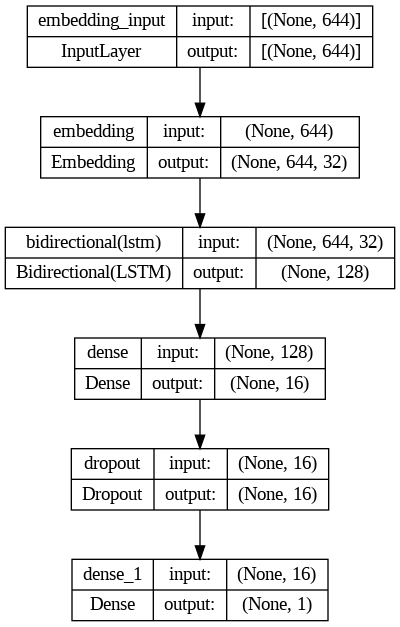

In [ ]:
#Shows a visual representation of the nerual network models, and shows its structure with the shapes and layer names and also saves it as an image file.
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#do model.summary() here
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 644, 32)           160000    
                                                                 
 bidirectional (Bidirection  (None, 128)               49664     
 al)                                                             
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 211745 (827.13 KB)
Trainable params: 211745 (827.13 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
print(len(model.layers))

5


In [ ]:
model.count_params()

211745

In [ ]:
#model training visualized
history = model.fit(x_train_features_padded, train_y,
                    batch_size=512,
                    epochs=20,
                    validation_data=(x_test_features_padded, test_y))

Epoch 1/20
115/115 [==============================] - 29s 196ms/step - loss: 0.3469 - accuracy: 0.8567 - val_loss: 0.0857 - val_accuracy: 0.9697
Epoch 2/20
115/115 [==============================] - 17s 150ms/step - loss: 0.0626 - accuracy: 0.9809 - val_loss: 0.0668 - val_accuracy: 0.9785
Epoch 3/20
115/115 [==============================] - 15s 130ms/step - loss: 0.0413 - accuracy: 0.9877 - val_loss: 0.0576 - val_accuracy: 0.9833
Epoch 4/20
115/115 [==============================] - 14s 120ms/step - loss: 0.0332 - accuracy: 0.9906 - val_loss: 0.0601 - val_accuracy: 0.9833
Epoch 5/20
115/115 [==============================] - 13s 110ms/step - loss: 0.0263 - accuracy: 0.9930 - val_loss: 0.0707 - val_accuracy: 0.9812
Epoch 6/20
115/115 [==============================] - 13s 111ms/step - loss: 0.0236 - accuracy: 0.9935 - val_loss: 0.0784 - val_accuracy: 0.9801
Epoch 7/20
115/115 [==============================] - 13s 112ms/step - loss: 0.0201 - accuracy: 0.9946 - val_loss: 0.0744 - val_ac

In [ ]:
#to test model predictions
y_predict = [1 if o>0.5 else 0 for o in model.predict(x_test_features_padded)]

783/783 [==============================] - 13s 16ms/step


In [ ]:
#confusion matrix and related model data
cf_matrix = confusion_matrix(test_y, y_predict)
tn, fp, fn, tp = confusion_matrix(test_y, y_predict).ravel()
print("Precision: {:.2f}%".format(100 * precision_score(test_y, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(test_y, y_predict)))
print("F1 Score {:.2f}%".format(100 * f1_score(test_y, y_predict)))
print(cf_matrix)

Precision: 96.62%
Recall: 99.27%
F1 Score 97.93%
[[11406   457]
 [   96 13076]]


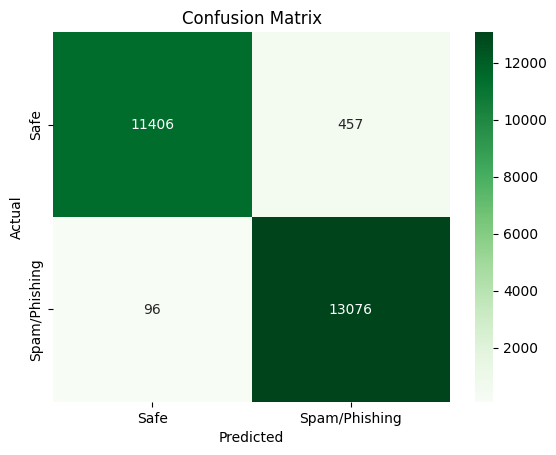

In [ ]:
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Greens',fmt='');
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels(['Safe', 'Spam/Phishing']); ax.yaxis.set_ticklabels(['Safe', 'Spam/Phishing']);

In [ ]:
txxt = '''Hi Student,
I am Dr. Yui Man Lui, I feel comfortable discussing this WORK- STUDY opening with you since
you were referred by the university chamber of commerce. I am very busy that is why i have
asked for your help as my temporary personal assistant. I provide individual and group therapy,
coaching, assessment and many University of students with academic difficulties and no prior
diagnosis are seen and assessed through the academic screening and assessment process.
You have received this email because you have an offer from the University Office to help
Students with Disabilities. You'll work with me while we help Students with disabilities frustrated
with ignorance and lack of services but as my temporary personal assistant
This is a very simple employment, You will only help me Mail letters, Make payments at retail
stores and purchase some Items when needed. This employment only takes an hour a day and
3 times a week for $350 weekly. I am unable to meetup for an interview because I am currently
away and helping the disabled students in Australia.
You will be paid in advance for all tasks and purchased to be done on my behalf and some of
my personal letters and mails will be forwarded to your residence or nearby post office for you to
pick up at your convenience. Upon my arrival we will discuss the possibility of making this a
long-term employment if I am impressed with your services while I am away. My arrival is
scheduled on first week of March 2024.
Please email your Full name, Residential Address to receive packages, Alternate email
(different from school email) and Cell # to email below:-
Dr. Yui Man Lui :- CONTACT ME BACK AT yuimanlui1921@gmail.com
Clinical Counselor
Disability Resources and Educational Services (DRES)'''


Hi Student,
I am Dr. Yui Man Lui, I feel comfortable discussing this WORK- STUDY opening with you since
you were referred by the university chamber of commerce. I am very busy that is why i have
asked for your help as my temporary personal assistant. I provide individual and group therapy,
coaching, assessment and many University of students with academic difficulties and no prior
diagnosis are seen and assessed through the academic screening and assessment process.
You have received this email because you have an offer from the University Office to help
Students with Disabilities. You'll work with me while we help Students with disabilities frustrated
with ignorance and lack of services but as my temporary personal assistant
This is a very simple employment, You will only help me Mail letters, Make payments at retail
stores and purchase some Items when needed. This employment only takes an hour a day and
3 times a week for $350 weekly. I am unable to meetup for an interview because I am currently
away and helping the disabled students in Australia.
You will be paid in advance for all tasks and purchased to be done on my behalf and some of
my personal letters and mails will be forwarded to your residence or nearby post office for you to
pick up at your convenience. Upon my arrival we will discuss the possibility of making this a
long-term employment if I am impressed with your services while I am away. My arrival is
scheduled on first week of March 2024.
Please email your Full name, Residential Address to receive packages, Alternate email
(different from school email) and Cell # to email below:-
Dr. Yui Man Lui :- CONTACT ME BACK AT yuimanlui1921@gmail.com
Clinical Counselor
Disability Resources and Educational Services (DRES)

In [ ]:
txt = txxt.lower()
txt = removeSpecial(txt)
txt = removeNumbers(txt)
txt = word_tokenize(txt)
txt = remove_stop_words(txt)
txt = removeURL(txt)
#txt = cleanURL(txt)
txt = removeHTML(txt)
txt = ' '.join(txt)
print(txt)

hi student dr yui man lui feel comfortable discussing work study opening since referred university chamber commerce busy asked help temporary personal assistant provide individual group therapy coaching assessment many university students academic difficulties prior diagnosis seen assessed academic screening assessment process received email offer university office help students disabilities youll work help students disabilities frustrated ignorance lack services temporary personal assistant simple employment help mail letters make payments retail stores purchase items needed employment takes hour day times week weekly unable meetup interview currently away helping disabled students australia paid advance tasks purchased done behalf personal letters mails forwarded residence nearby post office pick convenience upon arrival discuss possibility making longterm employment impressed services away arrival scheduled first week march please email full name residential address receive packages

In [ ]:
tokenizer.fit_on_texts(txt)

In [ ]:
txt_seq = tokenizer.texts_to_sequences(txt)

In [ ]:
txt_padded = pad_sequences(txt_seq, maxlen=max_length)

In [ ]:
y_pred = [1 if o>0.5 else 0 for o in model.predict(txt_padded)]
print(np.mean(y_pred))


37/37 [==============================] - 1s 18ms/step
1.0


In [ ]:
toxt = '''
Hello! I am in CSE-30, Campesato.

I want to attend this section to understand the homework that is assigned, so is it okay if I come?


Sincerely,
Arnav Sharma
'''

'''
Hello! I am in CSE-30, Campesato.

I want to attend this section to understand the homework that is assigned, so is it okay if I come?


Sincerely,
Arnav Sharma


In [ ]:
tot = toxt.lower()
tot = removeSpecial(tot)
tot = removeNumbers(tot)
tot = word_tokenize(tot)
tot = remove_stop_words(tot)
tot = removeURL(tot)
#tot = cleanURL(tot)
tot = removeHTML(tot)
tot = ' '.join(tot)
print(tot)

hello cse campesato want attend section understand homework assigned okay come sincerely arnav sharma


In [ ]:
tokenizer.fit_on_texts(tot)
tot_seq = tokenizer.texts_to_sequences(tot)
tot_padded = pad_sequences(tot_seq, maxlen=max_length)



In [ ]:
y_pred1 = [1 if o>0.5 else 0 for o in model.predict(tot_padded)]
print(np.mean(y_pred1))


4/4 [==============================] - 0s 15ms/step
1.0
